In [ ]:
#DATA THE DATA TO YOUR DRIVE 
# we need find a way to import the data. If someone can push train.csv to main github it will work. I have problem in working with git.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import all libraried
import pandas as pd
import matplotlib as plt
import seaborn as snb
import numpy as np
%matplotlib inline

In [ ]:
#Read the data
df=pd.read_csv(Path+'/septic_patients_data_alone_df.csv')

In [ ]:
#Returns number of groups where the data is not recorded atleast once
def nullValueCounting(dfInput, colName):
    dfNullValues =pd.DataFrame()
    colArray=dfInput[colName].unique()
    for i in colArray:   
        df_new=dfInput[dfInput[colName]==i].isnull().sum()
        dfNullValues=dfNullValues.append(df_new,ignore_index=True)
    dfNullValues.insert(0,colName+'New',colArray)
    dfNullValues=dfNullValues.astype(int)
    missingData=((dfNullValues!=0).sum()).to_frame()
    missingData['Percentage']=round(missingData/colArray.size,2)*100
    return dfNullValues , missingData

NameError: ignored

In [ ]:
def interPolate(dfInput,colName):
  df_inter=pd.DataFrame()
  colArray=dfInput[colName].unique()
  for i in colArray:
      df_new=dfInput[dfInput[colName]==i].interpolate(limit_direction='both')
      df_inter=df_inter.append(df_new)
  return df_inter

In [ ]:
nullValueInOriginal,numberOfGroupsWithNullValue=nullValueCounting(df,'Patient_ID')

In [ ]:
nullValueInOriginal

,Patient_IDNew,Unnamed: 0,Unnamed: 0.1,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,11093,0,0,0,1,1,60,2,1,2,1,60,48,48,39,48,54,56,58,48,58,53,45,54,60,53,56,45,53,45,59,60,52,52,59,52,60,56,0,0,60,60,0,0,0,0,0
1,10355,0,0,0,2,3,54,2,3,2,2,76,62,72,51,62,62,75,76,71,76,70,72,71,76,71,74,69,70,67,76,76,71,71,72,71,74,70,0,0,76,76,0,0,0,0,0
2,5328,0,0,0,1,5,8,1,1,9,1,9,8,8,9,8,8,9,9,8,9,8,8,8,9,9,8,8,8,8,9,9,8,8,8,8,8,8,0,0,0,0,0,0,0,0,0
3,5092,0,0,0,1,1,14,1,1,21,1,21,21,19,21,21,21,21,20,19,20,19,19,19,21,19,21,19,19,18,20,21,17,19,19,19,21,19,0,0,0,0,0,0,0,0,0
4,19826,0,0,0,3,3,31,3,3,3,4,43,38,41,31,38,38,43,42,41,42,41,41,41,43,40,41,41,41,40,42,43,39,39,41,40,43,40,0,0,43,43,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,115861,0,0,0,5,6,97,5,5,5,9,128,128,128,119,115,115,115,116,114,116,110,128,114,122,89,119,117,117,106,116,128,121,121,120,121,122,121,0,0,0,0,0,0,0,0,0
2928,112826,0,0,0,13,13,31,12,15,12,18,62,75,75,71,65,65,75,82,80,82,71,65,80,84,41,65,80,84,62,82,83,69,69,70,77,80,76,0,0,0,0,0,0,0,0,0
2929,102971,0,0,0,1,1,10,1,1,1,14,8,14,14,10,11,11,11,13,12,13,12,14,12,13,10,13,12,13,12,13,11,12,12,14,12,14,12,0,0,14,14,0,0,0,0,0
2930,111130,0,0,0,1,1,74,1,1,1,63,28,94,94,91,90,90,90,94,90,94,91,94,91,94,73,93,91,91,89,94,93,91,91,94,91,94,91,0,0,94,94,0,0,0,0,0


In [ ]:
numberOfGroupsWithNullValue

,0,Percentage
Patient_IDNew,2932,100.0
Unnamed: 0,0,0.0
Unnamed: 0.1,0,0.0
Hour,0,0.0
HR,2644,90.0
O2Sat,2695,92.0
Temp,2899,99.0
SBP,2736,93.0
MAP,2690,92.0
DBP,2783,95.0


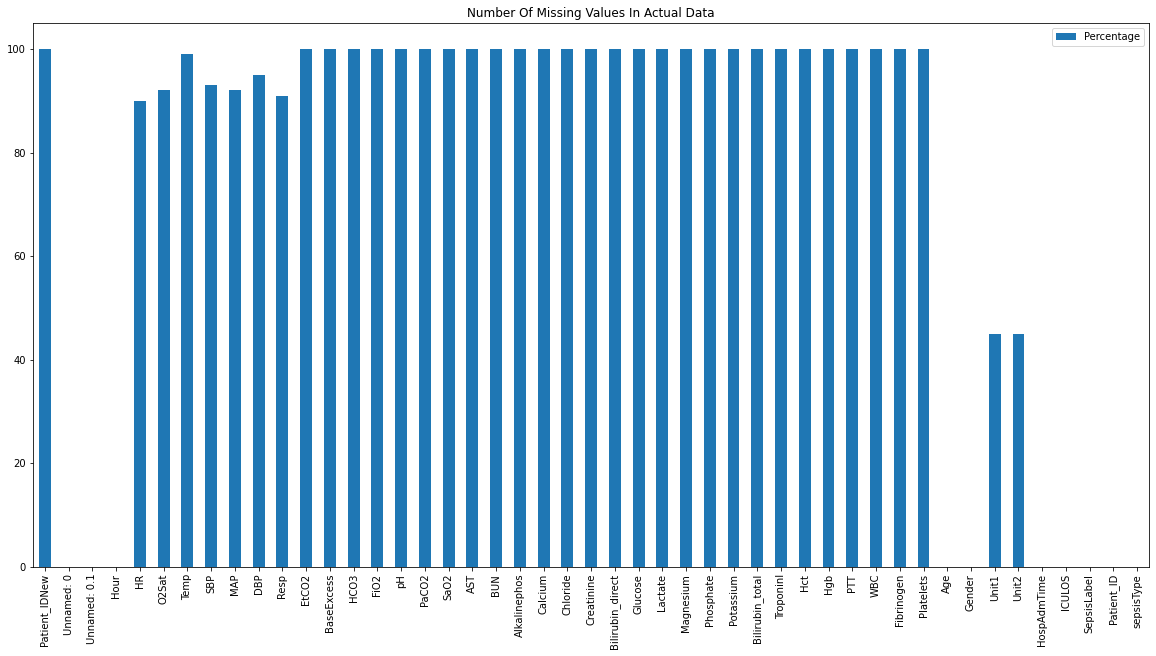

In [ ]:
numberOfGroupsWithNullValue.plot.bar(y='Percentage',figsize=(20, 10), title='Number Of Missing Values In Actual Data')

In [ ]:
df_interpolated=interPolate(df,'Patient_ID')

In [ ]:
nullValueAfterInterpolate,numberOfGroupsWithNullValueInterpolate=nullValueCounting(df_interpolated,'Patient_ID')

In [ ]:
nullValueAfterInterpolate

,Patient_IDNew,Unnamed: 0,Unnamed: 0.1,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,11093,0,0,0,0,0,60,0,0,0,0,60,0,0,0,0,0,0,0,0,0,0,0,0,60,0,0,0,0,0,0,60,0,0,0,0,60,0,0,0,60,60,0,0,0,0,0
1,10355,0,0,0,0,0,0,0,0,0,0,76,0,0,0,0,0,0,76,0,76,0,0,0,76,0,0,0,0,0,76,76,0,0,0,0,0,0,0,0,76,76,0,0,0,0,0
2,5328,0,0,0,0,0,0,0,0,9,0,9,0,0,9,0,0,9,9,0,9,0,0,0,9,9,0,0,0,0,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5092,0,0,0,0,0,0,0,0,21,0,21,21,0,21,21,21,21,0,0,0,0,0,0,21,0,21,0,0,0,0,21,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0
4,19826,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,43,0,0,0,0,0,0,43,0,0,0,0,0,0,43,0,0,0,0,43,0,0,0,43,43,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,115861,0,0,0,0,0,0,0,0,0,0,128,128,128,0,0,0,0,0,0,0,0,128,0,0,0,0,0,0,0,0,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2928,112826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,0,0,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2929,102971,0,0,0,0,0,0,0,0,0,14,0,14,14,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,14,0,14,0,0,0,14,14,0,0,0,0,0
2930,111130,0,0,0,0,0,0,0,0,0,0,0,94,94,0,0,0,0,94,0,94,0,94,0,94,0,0,0,0,0,94,0,0,0,94,0,94,0,0,0,94,94,0,0,0,0,0


In [ ]:
numberOfGroupsWithNullValueInterpolate

,0,Percentage
Patient_IDNew,2932,100.0
Unnamed: 0,0,0.0
Unnamed: 0.1,0,0.0
Hour,0,0.0
HR,0,0.0
O2Sat,2,0.0
Temp,35,1.0
SBP,111,4.0
MAP,0,0.0
DBP,494,17.0


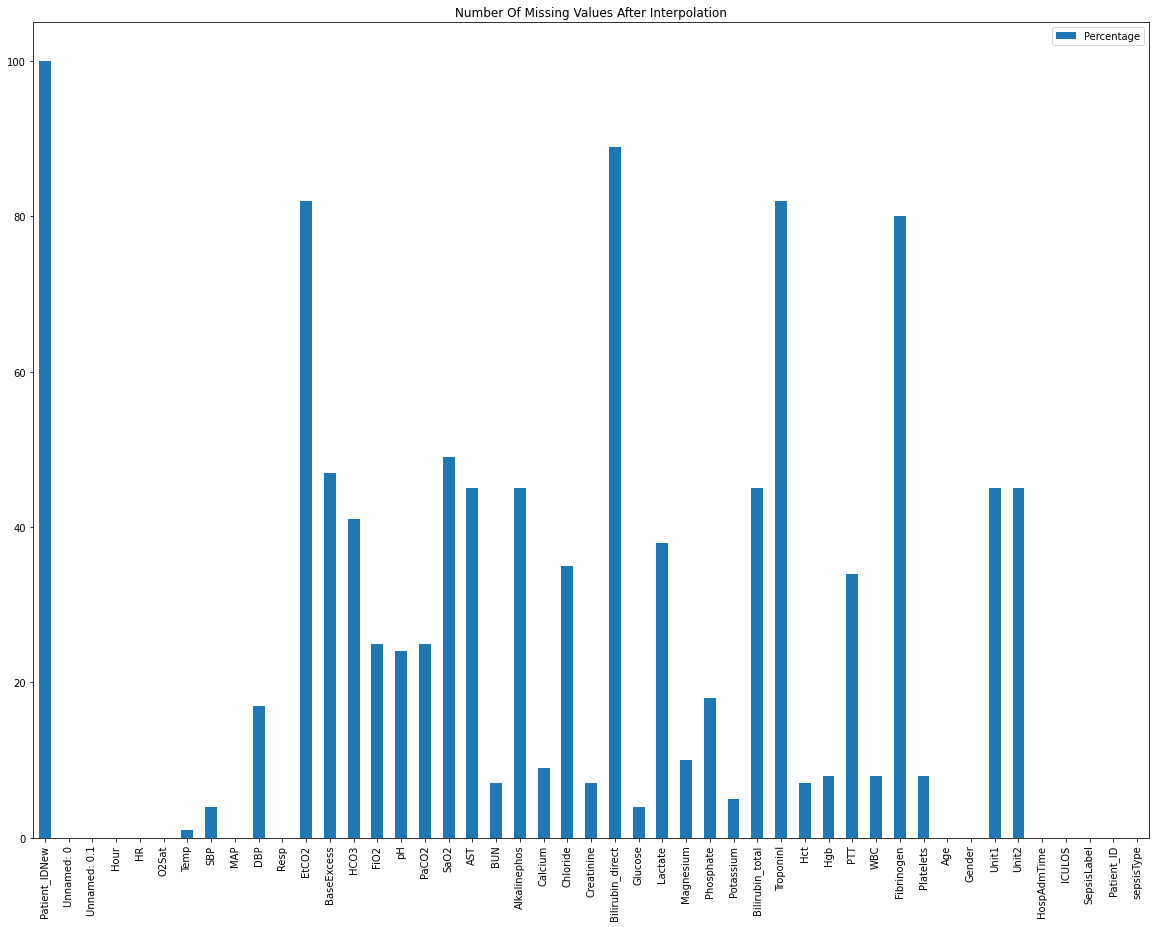

In [ ]:
numberOfGroupsWithNullValueInterpolate.plot.bar(y='Percentage',figsize=(20, 15), title='Number Of Missing Values After Interpolation')

In [ ]:
#Returns number of groups where data is recorded atleast once
def NonNullValueCounting(dfInput, colName):
    dfNonNullValues =pd.DataFrame()
    colArray=dfInput[colName].unique()
    for i in colArray:   
        df_new=dfInput[dfInput[colName]==i].notnull().sum()
        dfNonNullValues=dfNonNullValues.append(df_new,ignore_index=True)
    dfNonNullValues.insert(0,colName+'New',colArray)
    dfNonNullValues=dfNonNullValues.astype(int)
    ExistingData=((dfNonNullValues>0).sum()).to_frame()
    ExistingData['Percentage']=round(ExistingData/colArray.size,2)*100
    return dfNonNullValues , ExistingData

In [ ]:
DataRecorded,GroupsWithRecordedData=NonNullValueCounting(df_interpolated,'Patient_ID')

In [ ]:
DataRecordedActual,GroupsWithRecordedDataActual=NonNullValueCounting(df,'Patient_ID')

In [ ]:
DataRecorded

,Patient_IDNew,Unnamed: 0,Unnamed: 0.1,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,11093,60,60,60,60,60,0,60,60,60,60,0,60,60,60,60,60,60,60,60,60,60,60,60,0,60,60,60,60,60,60,0,60,60,60,60,0,60,60,60,0,0,60,60,60,60,60
1,10355,76,76,76,76,76,76,76,76,76,76,0,76,76,76,76,76,76,0,76,0,76,76,76,0,76,76,76,76,76,0,0,76,76,76,76,76,76,76,76,0,0,76,76,76,76,76
2,5328,9,9,9,9,9,9,9,9,0,9,0,9,9,0,9,9,0,0,9,0,9,9,9,0,0,9,9,9,9,0,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
3,5092,21,21,21,21,21,21,21,21,0,21,0,0,21,0,0,0,0,21,21,21,21,21,21,0,21,0,21,21,21,21,0,21,21,21,21,0,21,21,21,21,21,21,21,21,21,21
4,19826,43,43,43,43,43,43,43,43,43,43,0,43,43,43,43,43,0,43,43,43,43,43,43,0,43,43,43,43,43,43,0,43,43,43,43,0,43,43,43,0,0,43,43,43,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,115861,128,128,128,128,128,128,128,128,128,128,0,0,0,128,128,128,128,128,128,128,128,0,128,128,128,128,128,128,128,128,0,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
2928,112826,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,0,84,84,84,0,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84
2929,102971,14,14,14,14,14,14,14,14,14,0,14,0,0,14,14,14,14,14,14,14,14,0,14,14,14,14,14,14,14,14,14,14,14,0,14,0,14,14,14,0,0,14,14,14,14,14
2930,111130,94,94,94,94,94,94,94,94,94,94,94,0,0,94,94,94,94,0,94,0,94,0,94,0,94,94,94,94,94,0,94,94,94,0,94,0,94,94,94,0,0,94,94,94,94,94


In [ ]:
DataRecordedActual

,Patient_IDNew,Unnamed: 0,Unnamed: 0.1,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID,sepsisType
0,11093,60,60,60,59,59,0,58,59,58,59,0,12,12,21,12,6,4,2,12,2,7,15,6,0,7,4,15,7,15,1,0,8,8,1,8,0,4,60,60,0,0,60,60,60,60,60
1,10355,76,76,76,74,73,22,74,73,74,74,0,14,4,25,14,14,1,0,5,0,6,4,5,0,5,2,7,6,9,0,0,5,5,4,5,2,6,76,76,0,0,76,76,76,76,76
2,5328,9,9,9,8,4,1,8,8,0,8,0,1,1,0,1,1,0,0,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,9,9,9,9,9,9,9,9,9
3,5092,21,21,21,20,20,7,20,20,0,20,0,0,2,0,0,0,0,1,2,1,2,2,2,0,2,0,2,2,3,1,0,4,2,2,2,0,2,21,21,21,21,21,21,21,21,21
4,19826,43,43,43,40,40,12,40,40,40,39,0,5,2,12,5,5,0,1,2,1,2,2,2,0,3,2,2,2,3,1,0,4,4,2,3,0,3,43,43,0,0,43,43,43,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,115861,128,128,128,123,122,31,123,123,123,119,0,0,0,9,13,13,13,12,14,12,18,0,14,6,39,9,11,11,22,12,0,7,7,8,7,6,7,128,128,128,128,128,128,128,128,128
2928,112826,84,84,84,71,71,53,72,69,72,66,22,9,9,13,19,19,9,2,4,2,13,19,4,0,43,19,4,0,22,2,1,15,15,14,7,4,8,84,84,84,84,84,84,84,84,84
2929,102971,14,14,14,13,13,4,13,13,13,0,6,0,0,4,3,3,3,1,2,1,2,0,2,1,4,1,2,1,2,1,3,2,2,0,2,0,2,14,14,0,0,14,14,14,14,14
2930,111130,94,94,94,93,93,20,93,93,93,31,66,0,0,3,4,4,4,0,4,0,3,0,3,0,21,1,3,3,5,0,1,3,3,0,3,0,3,94,94,0,0,94,94,94,94,94


In [ ]:
GroupsWithRecordedData

,0,Percentage
Patient_IDNew,2932,100.0
Unnamed: 0,2932,100.0
Unnamed: 0.1,2932,100.0
Hour,2932,100.0
HR,2932,100.0
O2Sat,2930,100.0
Temp,2897,99.0
SBP,2821,96.0
MAP,2932,100.0
DBP,2438,83.0


In [ ]:
GroupsWithRecordedDataActual

,0,Percentage
Patient_IDNew,2932,100.0
Unnamed: 0,2932,100.0
Unnamed: 0.1,2932,100.0
Hour,2932,100.0
HR,2932,100.0
O2Sat,2930,100.0
Temp,2897,99.0
SBP,2821,96.0
MAP,2932,100.0
DBP,2438,83.0


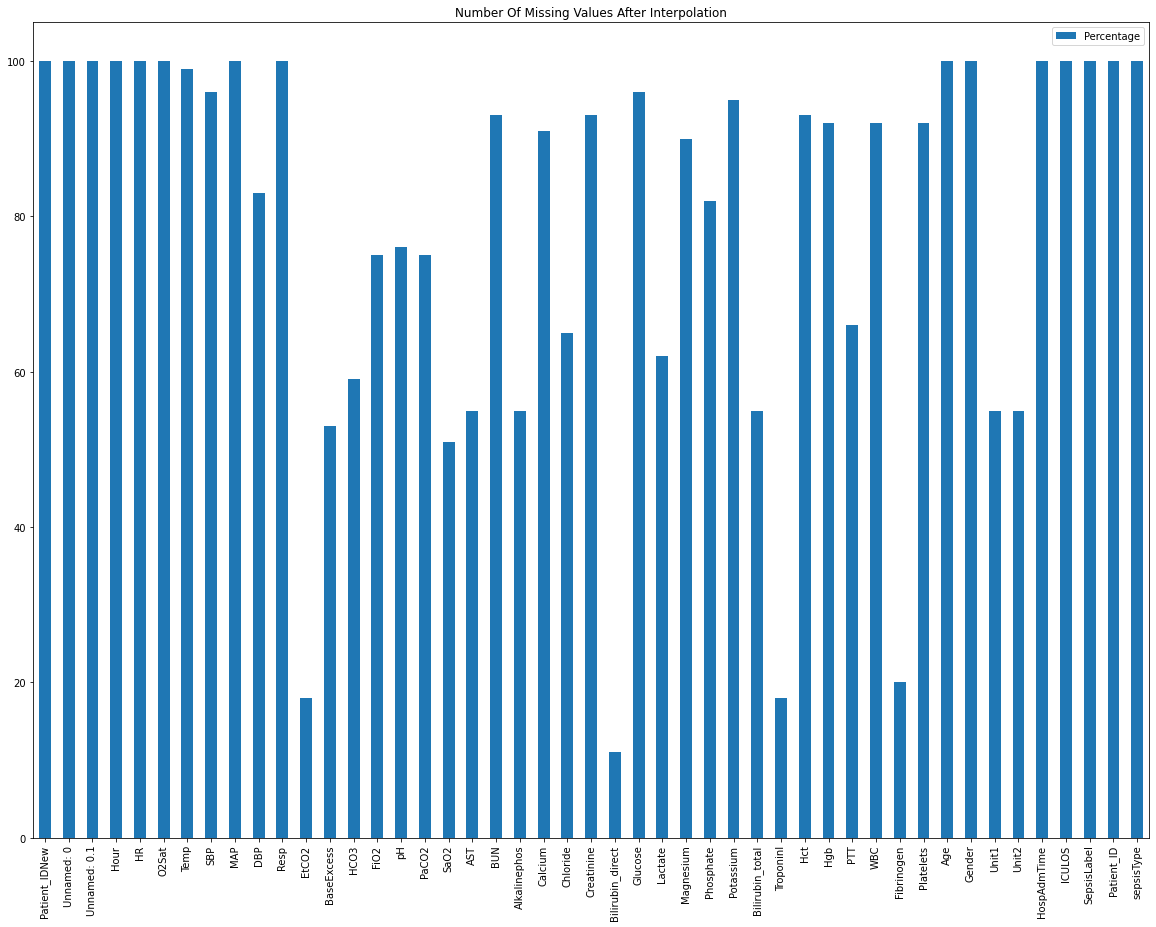

In [ ]:
GroupsWithRecordedData.plot.bar(y='Percentage',figsize=(20, 15), title='Number Of Missing Values After Interpolation')

In [ ]:
GroupsWithRecordedData.index[GroupsWithRecordedData['Percentage']>60]]

SyntaxError: ignored

In [ ]:
GroupsWithRecordedData.columns

Index([0, 'Percentage'], dtype='object')

In [ ]:
dfNonNullPer=GroupsWithRecordedData['Percentage']>50

In [ ]:
for i in GroupsWithRecordedDataActual.index):
    print(GroupsWithRecordedDataActual['Percentage'],GroupsWithRecordedDataActual['Percentage'])

In [ ]:
dfNonNullPer=dfNonNullPer.to_frame()

In [ ]:
dfNonNullPer['Percentage'].index

Index(['Patient_IDNew', 'Unnamed: 0', 'Unnamed: 0.1', 'Hour', 'HR', 'O2Sat',
       'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'BaseExcess', 'HCO3',
       'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium',
       'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate',
       'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI',
       'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID',
       'sepsisType'],
      dtype='object')

In [ ]:
dfNonNullPer.is_boolean()

AttributeError: ignored

In [ ]:
GroupsWithRecordedDataActual.index

In [ ]:
(GroupsWithRecordedDataActual.iloc[0])['Percentage']

100.0